First, we will start by importing some useful libraries into our notebook. The following libraries are used in this notebook: pandas, numpy, sklearn, matplotlib, and seaborn.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Then, we will read the csv files of the datasets we will be working with. Both datasets contain information about Portugese High School students and features that may affect their academic performance. However, the student-lpor.csv contains categorical variables whereas the en_lpor_classification.csv one-hot encodes these categorical variables into numerical variables.

In [2]:
student = pd.read_csv('/workspaces/dfproj-fa24/student-lpor.csv')
student_numerical = pd.read_csv('/workspaces/dfproj-fa24/en_lpor_classification.csv')

Step 1: EDA

In [3]:
student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [4]:
pd.options.display.max_columns = None
student.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13


In [5]:
student_numerical.head(5)

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,Legal_Responsibility,Commute_Time,Weekly_Study_Time,Extra_Educational_Support,Parental_Educational_Support,Private_Tutoring,Extracurricular_Activities,Attended_Daycare,Desire_Graduate_Education,Has_Internet,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,0,1,18,0,1,1,4,4,3,0,2,0,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11
1,0,1,17,0,1,0,1,1,3,4,2,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11
2,0,1,15,0,0,0,1,1,3,4,3,0,1,2,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13
3,0,1,15,0,1,0,4,2,1,2,0,0,1,3,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14
4,0,1,16,0,1,0,3,3,4,4,0,1,1,2,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13


In [6]:
student_numerical.describe()

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,Legal_Responsibility,Commute_Time,Weekly_Study_Time,Extra_Educational_Support,Parental_Educational_Support,Private_Tutoring,Extracurricular_Activities,Attended_Daycare,Desire_Graduate_Education,Has_Internet,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.590139,16.744222,0.303544,0.704160,0.123267,2.514638,2.306626,2.707242,3.049307,1.431433,0.362096,1.568567,1.930663,0.104777,0.613251,0.060092,0.485362,0.802773,0.893683,0.767334,0.368259,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,1.348511,1.218696,0.963211,0.598232,0.748660,0.829510,0.306502,0.487381,0.237841,0.500171,0.398212,0.308481,0.422857,0.482704,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000
50%,0.000000,1.000000,17.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,4.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,4.000000,3.000000,4.000000,4.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000


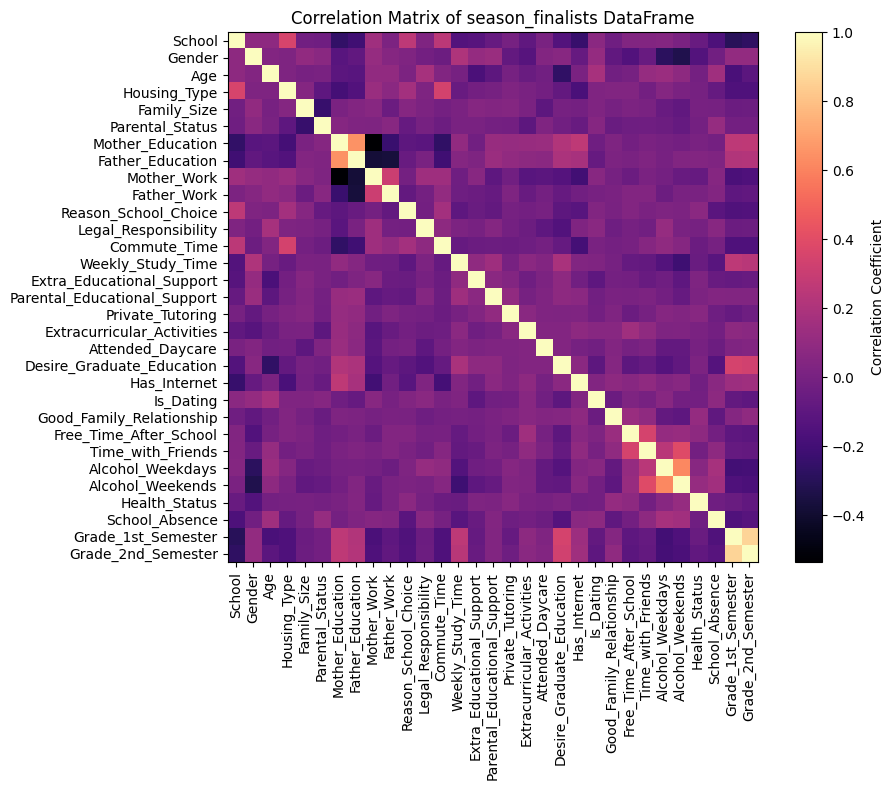

In [7]:
correlation_matrix = student_numerical.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='magma', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix of season_finalists DataFrame')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

In [8]:
student_numerical.corr()

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,Legal_Responsibility,Commute_Time,Weekly_Study_Time,Extra_Educational_Support,Parental_Educational_Support,Private_Tutoring,Extracurricular_Activities,Attended_Daycare,Desire_Graduate_Education,Has_Internet,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
School,1.000000,0.083050,0.087170,0.354520,-0.022252,-0.028120,-0.254787,-0.209806,0.151608,0.018211,0.257056,0.033364,0.252936,-0.137857,-0.123340,-0.063720,-0.007905,-0.088604,0.004659,-0.136112,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776
Gender,0.083050,1.000000,0.043662,0.025503,0.098205,0.064700,-0.119127,-0.083913,0.114223,0.054325,0.028519,-0.019301,-0.040880,0.206214,0.111202,0.129467,-0.079300,-0.124707,0.043603,0.058134,-0.065911,0.110144,-0.083473,-0.146305,-0.058178,-0.282696,-0.320785,-0.139547,-0.021336,0.104109,0.104005
Age,0.087170,0.043662,1.000000,0.025848,0.002470,0.005631,-0.107832,-0.121050,0.096202,0.094789,0.017911,0.171760,0.034490,-0.008415,-0.167841,-0.101894,-0.005458,-0.054279,-0.021441,-0.265497,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119
Housing_Type,0.354520,0.025503,0.025848,1.000000,0.046113,-0.094635,-0.190320,-0.141493,0.128512,0.069587,0.163674,0.026165,0.344902,-0.062023,-0.017956,-0.005577,0.030483,0.009278,-0.018077,-0.076706,-0.175794,0.030939,0.033897,0.036647,-0.015475,0.047304,0.012416,-0.003787,-0.073653,-0.157127,-0.154600
Family_Size,-0.022252,0.098205,0.002470,0.046113,1.000000,-0.239608,0.014325,0.039538,0.059604,-0.045834,0.055543,0.019892,-0.012794,0.010945,0.056405,0.039819,0.050253,0.014790,-0.100686,-0.004523,-0.013357,0.032936,-0.004641,0.021257,0.004312,-0.060482,-0.081958,-0.002448,-0.004645,-0.047230,-0.038891
Parental_Status,-0.028120,0.064700,0.005631,-0.094635,-0.239608,1.000000,0.057174,0.031856,0.025812,0.057947,-0.065814,-0.007587,-0.040633,0.008748,0.009456,-0.010203,-0.015923,-0.101555,0.032724,-0.022726,-0.059754,0.053828,-0.051303,-0.037585,-0.031086,-0.041513,-0.070976,-0.012638,0.117492,-0.015251,-0.018689
Mother_Education,-0.254787,-0.119127,-0.107832,-0.190320,0.014325,0.057174,1.000000,0.647477,-0.536829,-0.236021,-0.100401,-0.111274,-0.265079,0.097006,-0.022168,0.120491,0.113973,0.119354,0.125951,0.213896,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035
Father_Education,-0.209806,-0.083913,-0.121050,-0.141493,0.039538,0.031856,0.647477,1.000000,-0.376360,-0.363574,-0.060966,0.006902,-0.208288,0.050400,0.023572,0.135191,0.094628,0.079700,0.074863,0.191735,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139
Mother_Work,0.151608,0.114223,0.096202,0.128512,0.059604,0.025812,-0.536829,-0.376360,1.000000,0.313979,-0.014290,0.146910,0.143728,-0.027832,0.063127,-0.092705,-0.022049,-0.118474,-0.107690,-0.134293,-0.206238,0.059196,-0.002603,-0.045453,0.012780,-0.011831,-0.059446,-0.067353,0.054078,-0.169317,-0.158552
Father_Work,0.018211,0.054325,0.094789,0.069587,-0.045834,0.057947,-0.236021,-0.363574,0.313979,1.000000,-0.074679,-0.009709,0.102847,-0.037830,-0.046903,-0.063976,0.027030,-0.057043,-0.011730,-0.064027,-0.022623,0.003189,0.013539,0.040034,0.039938,-0.039808,0.006927,0.008617,0.041174,-0.093530,-0.085288


Creating a New Column, Average_grade, which is the average of the student's grade in the 1st and 2nd semester. 

In [9]:
average_grade = ((student['G1'].values + student['G2'].values)/2).round().astype(int)
student_numerical['Average_grade'] = average_grade
student_numerical = student_numerical.drop(columns=['Grade_1st_Semester', 'Grade_2nd_Semester'])


In [10]:
student_numerical.corr()

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,Legal_Responsibility,Commute_Time,Weekly_Study_Time,Extra_Educational_Support,Parental_Educational_Support,Private_Tutoring,Extracurricular_Activities,Attended_Daycare,Desire_Graduate_Education,Has_Internet,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Average_grade
School,1.000000,0.083050,0.087170,0.354520,-0.022252,-0.028120,-0.254787,-0.209806,0.151608,0.018211,0.257056,0.033364,0.252936,-0.137857,-0.123340,-0.063720,-0.007905,-0.088604,0.004659,-0.136112,-0.240486,0.072241,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.294151
Gender,0.083050,1.000000,0.043662,0.025503,0.098205,0.064700,-0.119127,-0.083913,0.114223,0.054325,0.028519,-0.019301,-0.040880,0.206214,0.111202,0.129467,-0.079300,-0.124707,0.043603,0.058134,-0.065911,0.110144,-0.083473,-0.146305,-0.058178,-0.282696,-0.320785,-0.139547,-0.021336,0.102251
Age,0.087170,0.043662,1.000000,0.025848,0.002470,0.005631,-0.107832,-0.121050,0.096202,0.094789,0.017911,0.171760,0.034490,-0.008415,-0.167841,-0.101894,-0.005458,-0.054279,-0.021441,-0.265497,0.013115,0.178810,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.140707
Housing_Type,0.354520,0.025503,0.025848,1.000000,0.046113,-0.094635,-0.190320,-0.141493,0.128512,0.069587,0.163674,0.026165,0.344902,-0.062023,-0.017956,-0.005577,0.030483,0.009278,-0.018077,-0.076706,-0.175794,0.030939,0.033897,0.036647,-0.015475,0.047304,0.012416,-0.003787,-0.073653,-0.161665
Family_Size,-0.022252,0.098205,0.002470,0.046113,1.000000,-0.239608,0.014325,0.039538,0.059604,-0.045834,0.055543,0.019892,-0.012794,0.010945,0.056405,0.039819,0.050253,0.014790,-0.100686,-0.004523,-0.013357,0.032936,-0.004641,0.021257,0.004312,-0.060482,-0.081958,-0.002448,-0.004645,-0.031617
Parental_Status,-0.028120,0.064700,0.005631,-0.094635,-0.239608,1.000000,0.057174,0.031856,0.025812,0.057947,-0.065814,-0.007587,-0.040633,0.008748,0.009456,-0.010203,-0.015923,-0.101555,0.032724,-0.022726,-0.059754,0.053828,-0.051303,-0.037585,-0.031086,-0.041513,-0.070976,-0.012638,0.117492,-0.025737
Mother_Education,-0.254787,-0.119127,-0.107832,-0.190320,0.014325,0.057174,1.000000,0.647477,-0.536829,-0.236021,-0.100401,-0.111274,-0.265079,0.097006,-0.022168,0.120491,0.113973,0.119354,0.125951,0.213896,0.266052,-0.030992,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.269258
Father_Education,-0.209806,-0.083913,-0.121050,-0.141493,0.039538,0.031856,0.647477,1.000000,-0.376360,-0.363574,-0.060966,0.006902,-0.208288,0.050400,0.023572,0.135191,0.094628,0.079700,0.074863,0.191735,0.183483,-0.067675,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.222094
Mother_Work,0.151608,0.114223,0.096202,0.128512,0.059604,0.025812,-0.536829,-0.376360,1.000000,0.313979,-0.014290,0.146910,0.143728,-0.027832,0.063127,-0.092705,-0.022049,-0.118474,-0.107690,-0.134293,-0.206238,0.059196,-0.002603,-0.045453,0.012780,-0.011831,-0.059446,-0.067353,0.054078,-0.165624
Father_Work,0.018211,0.054325,0.094789,0.069587,-0.045834,0.057947,-0.236021,-0.363574,0.313979,1.000000,-0.074679,-0.009709,0.102847,-0.037830,-0.046903,-0.063976,0.027030,-0.057043,-0.011730,-0.064027,-0.022623,0.003189,0.013539,0.040034,0.039938,-0.039808,0.006927,0.008617,0.041174,-0.091737


Use PCA since the "Average_grade" variable does not have a high correlation with any of the other variables. This helps with visualizations and seeing patterns within the data by reducing dimensionality.

In [16]:
pca_dataset = student_numerical.drop(columns = ["Average_grade"])
pca_dataset = (pca_dataset - np.mean(pca_dataset))/np.std(pca_dataset)
k = 4
pca = PCA(n_components=k)
pca.fit(pca_dataset)
principle_components = pca.transform(pca_dataset)

/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Create a dataframe using the principle components we generated above. We can do this by creating a helper function that generates a dataframe where each column in a principle component

In [12]:
def build_comps_df(components, label_df, dependent_var, colnames):
    df = pd.DataFrame(data=components, columns=colnames)
    df[dependent_var] = label_df[dependent_var]
    return df

In [13]:
student_comps = build_comps_df(principle_components, student_numerical, 'Average_grade', ['pca1', 'pca2', 'pca3', 'pca4'])
student_comps

,pca1,pca2,pca3,pca4,Average_grade
0,1.438047,-1.356182,-0.045030,-1.286198,6
1,-0.788724,-1.485332,0.984206,1.083427,10
2,-0.544600,-1.005409,0.454576,1.776113,12
3,2.818008,-1.829645,0.163103,-0.505013,14
4,0.565604,-1.671206,0.578050,0.745416,12
...,...,...,...,...,...
644,-0.563330,-0.415102,-0.962187,0.081772,10
645,0.641110,-0.783192,-0.125635,-1.191530,15
646,-2.416567,-2.444311,0.368528,-1.186084,12
647,-1.097273,2.996202,0.004866,-0.641059,10


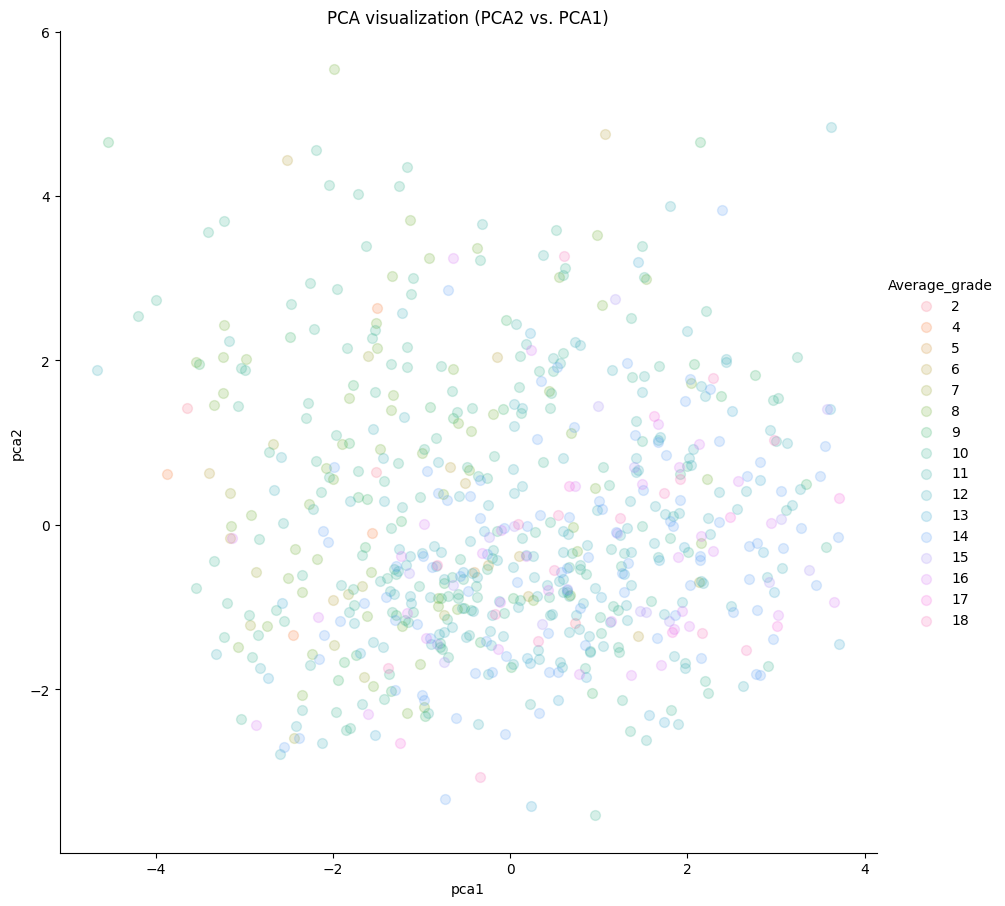

In [14]:
import seaborn as sns

sns.lmplot(x='pca1',
           y='pca2',
           data=student_comps,
           fit_reg=False,
           height=9,
           hue='Average_grade',
           scatter_kws={"s":50,"alpha":0.2})
plt.title("PCA visualization (PCA2 vs. PCA1)");

We attempted PCA, but there were no clear pattern or clusters in our scatterplot of PCA1 vs PCA2 that we could draw relevant inferences from. We then decided to continue with a Linear regression model.

Step 2: Splitting the data into training and testing sets

In [15]:
X = student_numerical[['Commute_Time','Mother_Education', 'Father_Education','Weekly_Study_Time', 'Desire_Graduate_Education','Alcohol_Weekdays', 'Alcohol_Weekends']]
y = student_numerical['Average_grade'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

Step 3: Fitting the linear regression model

In [12]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

Step 4: Making predictions using the model

In [13]:
y_pred = lin_model.predict(X_test)
y_train_pred = lin_model.predict(X_train)


Make a table to visualize all of the rows from X_test, y_test, and y_pred

In [14]:
linearreg_df = X_test
linearreg_df['actual'] = y_test
linearreg_df['predicted'] = y_pred
linearreg_df

,Commute_Time,Mother_Education,Father_Education,Weekly_Study_Time,Desire_Graduate_Education,Alcohol_Weekdays,Alcohol_Weekends,actual,predicted
636,1,4,4,2,1,1,4,18,12.653587
220,1,3,1,2,1,2,2,11,11.571400
594,2,4,4,2,1,1,2,18,12.590356
429,1,4,4,2,1,1,3,10,12.754732
72,1,1,1,2,1,2,4,12,10.732638
...,...,...,...,...,...,...,...,...,...
514,1,3,2,1,1,1,4,6,11.440164
374,1,3,1,3,1,2,3,18,11.972967
444,3,3,4,2,1,1,2,10,12.006599
244,1,4,3,2,1,1,2,13,12.659640


Step 5: Checking for error, using Linear Regression error loss functions (r^2 and RMSE)

In [15]:
trainingr2 = r2_score(y_train, y_train_pred)
print("Training R^2: " + str(trainingr2))
r2 = r2_score(y_test, y_pred) 
print("R^2: " + str(r2))
rmse = (mean_squared_error(y_test, y_pred))**(1/2)
print("RMSE: " + str(rmse))

Training R^2: 0.2385975027402676
R^2: 0.10760390460640912
RMSE: 2.7986495098374444


training R^2 is a lot greater than our predicted R^2, so that means we are overfitting

In an attempt to correct overftting, we removed features: 'Commute_Time', 'School_Absence', , 'Alcohol_Weekdays', 'Alcohol_Weekends'

In [17]:
X = student_numerical[['Mother_Education', 'Father_Education','Weekly_Study_Time', 'Desire_Graduate_Education']]
y = student_numerical['Average_grade'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [18]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lin_model.predict(X_test)
y_train_pred = lin_model.predict(X_train)

In [20]:
trainingr2 = r2_score(y_train, y_train_pred)
print("Training R^2: " + str(trainingr2))
r2 = r2_score(y_test, y_pred) 
print("R^2: " + str(r2))
rmse = (mean_squared_error(y_test, y_pred))**(1/2)
print("RMSE: " + str(rmse))

Training R^2: 0.20374666575835554
R^2: 0.1305675395460838
RMSE: 2.7624066283362896


Our training r^2 and testing r^2 are slightly closer, but in attempting to address overfitting by using feature selection, we noticed our Linear regression r^2 was quite low and might not be the best model to address the relationship between our predictor and target variables.

In [21]:
residual = y_pred - y_test

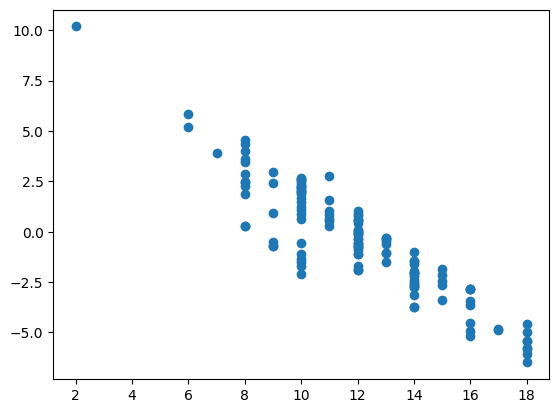

In [22]:
plt.scatter(y_test, residual)

Linear regression is not a good model in this case because we can see a clear linear pattern in our residual plot, and there should be no observable pattern for an appropriate linear regression model that captures the relationship between the predictor and target variables. This may be due to the fact that our predictor and target variables violate the Linear regression model assumption that there is a linear relationship between features and the target. Maybe we could try using a classification model or a nonlinear model to account for this nonlinearity in our dataset?

Since our Linear regression model was no good, we decided to try a classification model that predicts whether a student passes or fails based on certain features.

Now that we are using a classification model, we should convert the numerical Average_grade prediction variable into a binary classification target with the threshold of an average grade of 10 or higher being passing. 10 is the minimum passing grade in Portugese High Schools. 

In [23]:
student_numerical['pass'] = (student_numerical["Average_grade"]>=10).astype(int)
print(student_numerical[["Average_grade", "pass"]].head())

   Average_grade  pass
0              6     0
1             10     1
2             12     1
3             14     1
4             12     1


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import plot_tree


In [25]:
X = student_numerical[['Mother_Education', 'Father_Education', 'Weekly_Study_Time', 'Desire_Graduate_Education']]
y = student_numerical['pass'].values


X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)


In [26]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7846153846153846

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.27      0.30        22
           1       0.86      0.89      0.87       108

    accuracy                           0.78       130
   macro avg       0.60      0.58      0.59       130
weighted avg       0.77      0.78      0.78       130


Confusion Matrix:
 [[ 6 16]
 [12 96]]


Although our accuracy is fairly high, it is not the best metric to measure the performance of our classification model. As you can see, our precission, recall, and f1-score for the 0 class is really low, which means our model is doing a poor job at correctly classifying students who are failing. This is likely due to the class imbalance in our data set, in which there are significantly more students who are passing than failing. We can handle this using Oversampling of the minority class (in this case, it's the 0(fail) class).

In [28]:
minority = student_numerical.loc[student_numerical["pass"] == 0].copy()
majority = student_numerical.loc[student_numerical["pass"] == 1].copy()
minority

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,Legal_Responsibility,Commute_Time,Weekly_Study_Time,Extra_Educational_Support,Parental_Educational_Support,Private_Tutoring,Extracurricular_Activities,Attended_Daycare,Desire_Graduate_Education,Has_Internet,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Average_grade,pass
0,0,1,18,0,1,1,4,4,3,0,2,0,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6,0
18,0,0,17,0,1,0,3,2,2,2,2,0,1,1,0,1,1,1,1,1,1,0,5,5,5,2,4,5,2,8,0
78,0,0,17,0,1,0,2,1,4,4,0,0,2,1,1,1,0,1,1,0,1,0,4,5,1,1,1,3,0,9,0
89,0,0,16,0,0,1,4,4,0,1,1,0,1,2,0,1,0,0,1,1,0,0,4,1,3,3,5,5,6,9,0
100,0,0,16,0,1,0,4,4,2,2,3,0,1,1,1,1,0,1,1,1,1,0,4,5,5,5,5,4,12,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,1,0,18,1,1,0,2,1,4,4,3,0,2,1,0,0,0,1,0,1,1,1,4,4,3,1,3,5,0,7,0
639,1,0,19,1,1,0,1,1,4,2,3,0,2,1,0,0,0,0,1,1,0,0,4,3,2,1,3,5,0,6,0
640,1,0,18,1,1,0,4,2,4,4,0,1,2,1,0,0,1,0,1,1,0,0,5,4,3,4,3,3,0,7,0
642,1,1,17,0,1,0,4,3,0,4,3,0,2,2,0,0,0,0,1,1,1,0,5,5,4,1,1,1,0,8,0


In [29]:
print(len(minority))
print(len(majority))

125
524


As you can see, there are signifcantly more students in our dataset that are passing than failing. 

In [30]:
print(524-125)

399


To balance the dataset (match the number of passing and failing students), we drew random samples from our minority group, which is the group of students who are failing in our dataset.

In [31]:
minority_oversampled = minority.sample(524, replace=True)
minority_oversampled


,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,Reason_School_Choice,Legal_Responsibility,Commute_Time,Weekly_Study_Time,Extra_Educational_Support,Parental_Educational_Support,Private_Tutoring,Extracurricular_Activities,Attended_Daycare,Desire_Graduate_Education,Has_Internet,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Average_grade,pass
610,1,1,19,1,1,1,1,1,3,3,2,2,2,2,0,1,0,1,1,0,0,1,3,5,4,1,4,1,0,4,0
155,0,0,17,0,1,0,2,1,4,4,0,0,1,1,0,1,0,0,1,1,1,0,5,4,5,1,2,5,22,8,0
479,1,1,17,0,1,0,2,2,4,3,2,0,1,1,0,1,0,1,1,0,0,0,4,5,3,1,1,5,4,9,0
256,0,0,18,0,1,0,2,2,4,3,2,2,1,1,0,1,0,1,0,0,1,1,4,4,3,2,2,1,26,8,0
587,1,1,18,1,0,0,2,2,2,2,2,0,1,2,0,1,0,1,1,1,1,0,2,3,3,1,2,4,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,1,1,17,0,1,0,4,1,1,3,2,0,1,1,0,1,0,0,1,1,0,1,3,2,2,1,1,5,0,9,0
473,1,0,16,0,0,0,2,1,3,2,2,0,2,1,0,1,0,1,1,1,1,0,2,4,3,2,3,4,4,9,0
248,0,0,16,0,0,0,1,1,4,4,0,0,2,2,0,1,0,0,1,1,1,0,3,4,2,1,1,5,2,9,0
522,1,1,16,0,1,0,4,4,1,1,2,0,1,2,0,1,0,0,1,1,1,1,4,3,4,1,2,3,4,8,0


We then added the randomly sampled rows of our minority class to our table 

In [32]:
oversampled_tbl = pd.concat([majority, minority_oversampled])

Now, we can create a new model that is fit to the oversampled table with the balanced classes and see how it performs.

In [33]:
X = oversampled_tbl[['Mother_Education', 'Father_Education', 'Weekly_Study_Time', 'Desire_Graduate_Education']]
y = oversampled_tbl['pass'].values


X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [34]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70        97
           1       0.74      0.72      0.73       113

    accuracy                           0.71       210
   macro avg       0.71      0.71      0.71       210
weighted avg       0.72      0.71      0.71       210



Now the precision, recall, and f1-score are better :)

In order to check for overfitting or underfitting, we can compare the training accuracy and the test accuracy. 

In [36]:
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.74


The training and testing accuracy are pretty close to each other, which indicates that we did a good job at accounting for overfitting. Furhtermore, our training and testing accuracies are fairly high, which means that our model generally captures the relationship between our features and target variable and accounts for underfitting. 

Since we randomly sampled from the minority class, we made a function that calculates the accuracy of our model based on the sample from the minority class. 

In [37]:
def one_sample_accuracy():
   minority = student_numerical.loc[student_numerical["pass"] == 0].copy()
   majority = student_numerical.loc[student_numerical["pass"] == 1].copy()
   minority_oversampled = minority.sample(524, replace=True)
   oversampled_tbl = pd.concat([majority, minority_oversampled])
   X = oversampled_tbl[['Mother_Education', 'Father_Education', 'Weekly_Study_Time', 'Desire_Graduate_Education']]
   y = oversampled_tbl['pass'].values
   X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
   clf = DecisionTreeClassifier()
   clf = clf.fit(X_train,y_train)
   y_pred = clf.predict(X_test)
   accuracies = accuracy_score(y_test, y_pred)
   return accuracies

We used this function to repeatedly sample the accuracy of our model based on different minority random samples, and made a confidence interval and a histogram visualization for the accuracy of our model. 

Confidence Interval: [np.float64(0.6666666666666666), np.float64(0.7619047619047619)]
Mean Accuracy: 0.7170680952380951
Standard Deviation: 0.023758084199964603


array([[<Axes: title={'center': 'Accuracies'}>]], dtype=object)

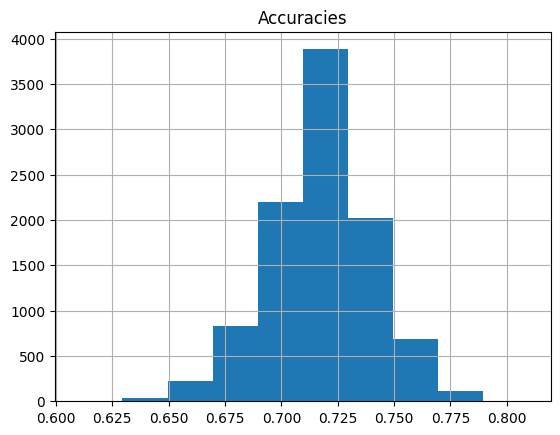

In [38]:
reps = np.arange(10000)
accuracies = []
for i in reps:
   sample = one_sample_accuracy()
   accuracies.append(sample)
data = {'Accuracies': accuracies}
tbl = pd.DataFrame(data)
lower_bound = np.percentile(accuracies, 2.5)
upper_bound = np.percentile(accuracies, 97.5)
interval = [lower_bound, upper_bound]
print(f"Confidence Interval: {interval}")
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Standard Deviation: {np.std(accuracies)}")
tbl.hist()

Based on our random samples, we are 95% confident that our model has an accuracy that is between 67 to 76% and is 71% on average with a standard deviation of ~2%. 